In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots

# 데이터 정보



#### watt의 outlier 제거 (z-score > 3 제거))
#### 기업 환경정보 + 공공 환경정보 + 기업 발전량 정보

In [7]:


banpo1 = pd.read_csv("./1차join/banpo1_join.csv")
newrec1 = pd.read_csv("./1차join/NewREC1_join.csv")
lh = pd.read_csv("./1차join/LH1_join.csv")
miribeol = pd.read_csv("./1차join/miribeol_join.csv")
ongok = pd.read_csv("./1차join/ongok_join.csv")
# myosan = pd.read_csv("./myosan_join.csv")

banpo1.head(5)

,Unnamed: 0,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
0,2018-10-22 12:00,333.375000,321.937500,25.050000,17.881250,480.116279,11.560465,5536.874419,18.2,0.0,1.0,20.0,34.0,1.0,2.03,0.0,5.0,14.9,563.888889,0.016387
1,2018-10-22 13:00,490.514286,563.442857,28.157143,18.405714,481.428571,14.126531,6808.306122,19.4,0.0,1.2,180.0,35.0,0.8,1.73,0.0,9.0,15.9,480.555556,0.343702
2,2018-10-22 14:00,368.214286,426.042857,26.777143,19.221429,483.090909,10.850909,5217.690909,20.6,0.0,2.2,180.0,30.0,0.7,1.69,0.0,8.0,16.7,469.444444,-0.065783
3,2018-10-22 15:00,242.214286,294.400000,21.861429,18.455714,483.459016,6.842623,3306.254098,20.2,0.0,1.6,180.0,31.0,1.0,1.25,0.0,8.0,17.4,347.222222,-0.557859
4,2018-10-22 16:00,116.159420,132.362319,18.288406,17.346377,480.047619,3.265079,1589.776190,19.7,0.0,1.6,270.0,34.0,0.7,0.88,0.0,9.0,17.9,244.444444,-0.999746


In [9]:
banpo1_date = pd.to_datetime(banpo1["Unnamed: 0"])
newrec1_date = pd.to_datetime(newrec1["Unnamed: 0"])
lh_date = pd.to_datetime(lh["Unnamed: 0"])
miribeol_date = pd.to_datetime(miribeol["Unnamed: 0"])
ongok_date = pd.to_datetime(ongok["Unnamed: 0"])


banpo1.index = banpo1_date
newrec1.index = newrec1_date
lh.index = lh_date
miribeol.index = miribeol_date
ongok.index = ongok_date

In [10]:
banpo1.describe()
# sns.boxplot()

banpo1 = banpo1[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
newrec1 = newrec1[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
lh = lh[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
ongok = ongok[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]
banpo1.iloc[750:].head(50)
# myosan = myosan[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]

,env_slopesolar,env_levelsolar,match_solar,watt
Unnamed: 0,,,,
2019-01-14 13:00:00,273.771429,303.985714,294.444444,4172.418966
2019-01-14 14:00:00,232.785714,261.814286,269.444444,3432.926230
2019-01-14 15:00:00,163.188406,166.565217,244.444444,2393.453968
2019-01-14 16:00:00,62.714286,58.442857,136.111111,789.556716
2019-01-14 17:00:00,3.194030,2.179104,72.222222,33.006250
2019-01-15 09:00:00,60.342857,49.157143,44.444444,896.808696
2019-01-15 10:00:00,171.142857,163.614286,113.888889,2748.758065
2019-01-15 11:00:00,267.449275,278.797101,236.111111,4274.514035
2019-01-15 12:00:00,226.528571,208.028571,197.222222,3646.137705


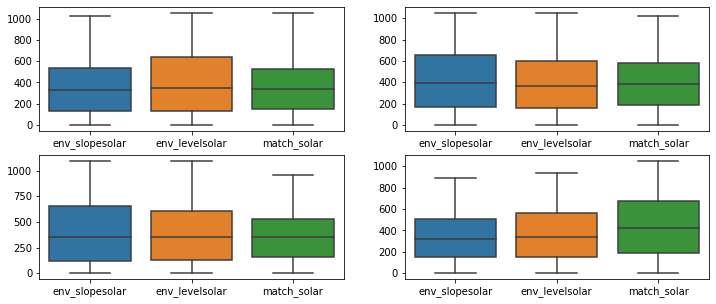

In [13]:


def boxplot():
    f, axes = plt.subplots(2, 2, figsize=(12, 5))
    
    sns.boxplot(data = banpo1[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[0][0])
    sns.boxplot(data = newrec1[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[0][1])
    sns.boxplot(data = lh[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[1][0])
    sns.boxplot(data = ongok[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[1][1])

boxplot()

In [14]:
def resampleD_sum(df):
    return df.resample('D').sum()


def resampleD_mean(df):
    return df.resample('D').mean()


def delete_zero(df):
    df = df[(df["env_slopesolar"] != 0 ) & ( df["env_levelsolar"] != 0 ) & ( df["match_solar"] != 0 )]
    
    return df


def mean_absolute_percentage_error(a, b, df):

    a_set, b_set = np.array(df[a]), np.array(df[b])

    return np.mean(np.abs((a_set - b_set) / a_set)) * 100 ##,  np.abs((a_set - b_set) / a_set)

def mean_absolute_percentage_error2(a, b, df):

    a_set, b_set = np.array(df[a]), np.array(df[b])

    return np.mean(np.abs((a_set - b_set) / a_set)) * 100, np.abs((a_set - b_set) / a_set)

def make_graph(a, b, df):
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=df.index, y=df[a], mode='lines', name=a, line=dict(color='blue')), secondary_y = False)
    fig.add_trace(go.Scatter(x=df.index, y=df[b], mode='lines', name=b, line=dict(color='red')), secondary_y = False)
    fig.update_layout(width=1000, height=500,)
    fig.show()

def corr(a, b, df):
    return df[[a, b]].corr()


In [16]:
banpo1_day = delete_zero(resampleD_sum(banpo1))
newrec1_day = delete_zero(resampleD_sum(newrec1))
lh_day = delete_zero(resampleD_sum(lh))
ongok_day = delete_zero(resampleD_sum(ongok))

print(banpo1_day.describe())
def for_print(a, b, name, df):

    print(name," - ", a,",", b," : ", mean_absolute_percentage_error(a, b, df))

for_print("env_levelsolar", "match_solar", "banpo1", banpo1_day)
for_print("env_levelsolar", "match_solar", "newrec1", newrec1_day)
for_print("env_levelsolar", "match_solar", "lh", lh_day)
for_print("env_levelsolar", "match_solar", "ongok", ongok_day)
print("--------------------")

for_print("env_slopesolar", "match_solar", "banpo1", banpo1_day)
for_print("env_slopesolar", "match_solar", "newrec1", newrec1_day)
for_print("env_slopesolar", "match_solar", "lh", lh_day)
for_print("env_slopesolar", "match_solar", "ongok", ongok_day)

# boxplot()



       env_slopesolar  env_levelsolar  match_solar           watt
count      484.000000      484.000000   484.000000     484.000000
mean      3172.991918     3503.366038  3230.974518   48806.653683
std       1620.381805     1741.262168  1668.372047   24263.318341
min        129.397669       96.868792   180.555556     767.801983
25%       1970.076221     2038.762907  1995.138889   31736.995964
50%       3013.926513     3852.773848  2977.777778   45878.832752
75%       4278.368168     4909.845086  4411.805556   66201.599292
max       7156.856315     6761.228986  7475.000000  112630.145259
banpo1  -  env_levelsolar , match_solar  :  25.241327015223465
newrec1  -  env_levelsolar , match_solar  :  29.327527405781467
lh  -  env_levelsolar , match_solar  :  19.758398835000314
ongok  -  env_levelsolar , match_solar  :  26.454423927136588
--------------------
banpo1  -  env_slopesolar , match_solar  :  10.251140659165998
newrec1  -  env_slopesolar , match_solar  :  30.958639823144534
lh  -  env

In [17]:
make_graph("env_slopesolar", "match_solar", banpo1_day)
make_graph("env_slopesolar", "match_solar", ongok_day)
make_graph("env_levelsolar", "match_solar", lh_day)

2.248367742551988 5.269355903351666 11.109576840760807 202.68448396371213
11.661835379124987 21.574449947411384 33.87222164386431 282.7344127267592
18.942182468394066 31.81750214945235 47.474618563553555 294.63057639830225


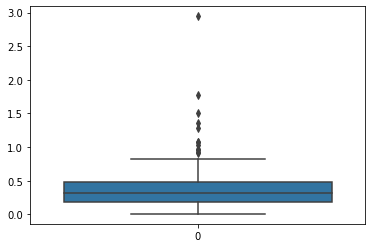

In [18]:
_, diff = mean_absolute_percentage_error2("env_slopesolar", "match_solar", banpo1_day)
_, diff2 = mean_absolute_percentage_error2("env_levelsolar", "match_solar", banpo1_day)
_, diff3 = mean_absolute_percentage_error2("env_slopesolar", "match_solar", ongok_day)

print(np.quantile(diff, 0.25)*100, np.quantile(diff, 0.5)*100, np.quantile(diff, 0.75)*100, np.quantile(diff, 1)*100 )
print(np.quantile(diff2, 0.25)*100, np.quantile(diff2, 0.5)*100, np.quantile(diff2, 0.75)*100, np.quantile(diff2, 1)*100 )
print(np.quantile(diff3, 0.25)*100, np.quantile(diff3, 0.5)*100, np.quantile(diff3, 0.75)*100, np.quantile(diff3, 1)*100 )
sns.boxplot(data = diff3)

In [19]:
corr("env_slopesolar", "match_solar", ongok_day)

,env_slopesolar,match_solar
env_slopesolar,1.000000,0.953994
match_solar,0.953994,1.000000


1.0182737937533082
0.9662253368102252
0.9202604515368206
1.3105339891827072
       env_slopesolar  env_levelsolar  match_solar           watt  \
count      484.000000      484.000000   484.000000     484.000000   
mean      3172.991918     3503.366038  3230.974518   48806.653683   
std       1620.381805     1741.262168  1668.372047   24263.318341   
min        129.397669       96.868792   180.555556     767.801983   
25%       1970.076221     2038.762907  1995.138889   31736.995964   
50%       3013.926513     3852.773848  2977.777778   45878.832752   
75%       4278.368168     4909.845086  4411.805556   66201.599292   
max       7156.856315     6761.228986  7475.000000  112630.145259   

       reset_match        diff  
count   484.000000  484.000000  
mean   3230.974518    0.099792  
std    1649.992328    0.164248  
min     131.762255    0.000123  
25%    2006.076987    0.025163  
50%    3069.002384    0.055637  
75%    4356.550185    0.110874  
max    7287.639231    1.972526  


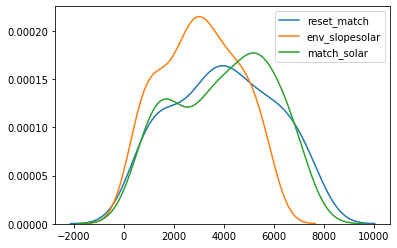

In [25]:
def reset_match(a, b, df):
    df["reset_match"] = df[b] * df[a].mean() / df[b].mean()

    """ 
    월별로 나눠서 월별로 곱하고 월별로 매치
    
    """

    
    """
    평균값을 (최근1달) 동절기, 하절기 
    
    1) 어두울때 더 어둡게 나오는 부분(09, 17,18) 거의 음수, 
    2) 밝을때 더 밝게 나오는 경우(12~13) 거의 양수 
    3) 중간에서는 정확히 일치를 해야함(~) 0에 가깝게 
    -> 객관적 확인, 각 시간대별 나눠서 확인 차이를 확인 

        idea, 외부기상청 정보를 통해 예측,
    
    1) 시계열을 고려하여 시계열 예측의 주기적인 패턴을 사용하여 예측의 기본을 만들고,  
    -> (흐린날, 맑은날) 의 일기예보로 조정 + 예측 일사량을 가지고 보정
    -> easy, 외부정보 거의 사용하지 않고 예측 (forecast) : 가장 맑은 날의 추세, 가장 흐린 날의 추세 
    패턴을 가져다가 대략적 일기예보-> 가중치, 최상 최하의 예측 
    -> (시간대별 패턴 월별 단위로)로 학습을 시킴, 월별 단위가 없을때, 패턴이 가장 비슷한 발전소-> 학습  
    * 중요한건 패턴, 

    2) scaling 해서 예측값과 확인을 하고 더 잘 예측되는 방향으로 진행 

    3) 여러가지 믹싱해서 만들
    
    """

    print(df[b].mean() / df[a].mean())

    return df
# ongok_day["reset_match"] = ongok_day["match_solar"] * 3109.861398 / 4145.840605

banpo1_day = reset_match("env_slopesolar", "match_solar", banpo1_day)
newrec1_day = reset_match("env_slopesolar", "match_solar", newrec1_day)
lh_day = reset_match("env_slopesolar", "match_solar", lh_day)
ongok_day = reset_match("env_slopesolar", "match_solar", ongok_day)
ongok_day 
# for_print("env_slopesolar", "reset_match", "ongok", ongok_day)
# banpo1_day
# sns.boxplot(data=ongok_day[["env_slopesolar", "reset_match"]])
print(banpo1_day.describe())
sns.kdeplot(data=ongok_day["reset_match"])
sns.kdeplot(data=ongok_day["env_slopesolar"])
sns.kdeplot(data=ongok_day["match_solar"])

# sns.boxplot(data = banpo1_day[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]])

### OUTLIER 제거 ,, x < 0.75


In [23]:

_, diff1 = mean_absolute_percentage_error2("env_slopesolar", "reset_match", banpo1_day)
_, diff3 = mean_absolute_percentage_error2("env_slopesolar", "reset_match", newrec1_day)
_, diff5 = mean_absolute_percentage_error2("env_slopesolar", "reset_match", lh_day)
_, diff6 = mean_absolute_percentage_error2("env_slopesolar", "reset_match", ongok_day)



banpo1_day["diff"] = diff1
newrec1_day["diff"] = diff3
lh_day["diff"] = diff5
ongok_day["diff"] = diff6

def qunatile_3(df):
    a = df["diff"] 
    return df[(df["diff"] < np.quantile(a, 0.9))]


# del_outlier = dump2["diff"].to_numpy()
print(np.mean(qunatile_3(banpo1_day)["diff"]) * 100)
print(np.mean(qunatile_3(newrec1_day)["diff"]) * 100)
print(np.mean(qunatile_3(lh_day)["diff"]) * 100)
print(np.mean(qunatile_3(ongok_day)["diff"]) * 100)
# np.mean((banpo1_day)["diff"]) * 100



4.31225057519868
11.989307519654462
8.389723294452681
8.020536915671196


### StandardScaler 사용
### RobustScaler 사용

=> 아닌거같음

### 하루 평균치 사용

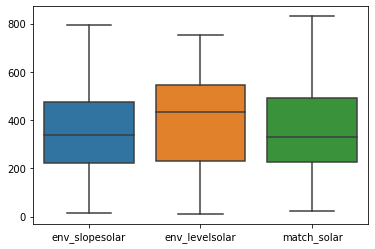

In [24]:
banpo1_day_m = delete_zero(resampleD_mean(banpo1).fillna(0))
newrec1_day_m = delete_zero(resampleD_mean(newrec1).fillna(0))
lh_day_m = delete_zero(resampleD_mean(lh).fillna(0))
ongok_day_m = delete_zero(resampleD_mean(ongok).fillna(0))

banpo1_day_m.describe()

sns.boxplot(data = banpo1_day_m[["env_slopesolar", "env_levelsolar", "match_solar"]])
# sns.boxplot(data = banpo1_day[["env_slopesolar", "env_levelsolar", "match_solar"]])

In [15]:
def for_print(a, b, name, df):

    print(name," - ", a,",", b," : ", mean_absolute_percentage_error(a, b, df))

for_print("env_levelsolar", "match_solar", "banpo1", banpo1_day_m)
for_print("env_levelsolar", "match_solar", "banpo2", banpo2_day_m)
for_print("env_levelsolar", "match_solar", "newrec1", newrec1_day_m)
for_print("env_levelsolar", "match_solar", "newrec2", newrec2_day_m)
for_print("env_levelsolar", "match_solar", "lh", lh_day_m)
for_print("env_levelsolar", "match_solar", "ongok", ongok_day_m)
print("--------------------")

for_print("env_slopesolar", "match_solar", "banpo1", banpo1_day_m)
for_print("env_slopesolar", "match_solar", "banpo2", banpo2_day_m)
for_print("env_slopesolar", "match_solar", "newrec1", newrec1_day_m)
for_print("env_slopesolar", "match_solar", "newrec2", newrec2_day_m)
for_print("env_slopesolar", "match_solar", "lh", lh_day_m)
for_print("env_slopesolar", "match_solar", "ongok", ongok_day_m)


# print(mean_absolute_percentage_error2("env_slopesolar", "match_solar", banpo1_day_m))

banpo1  -  env_levelsolar , match_solar  :  26.096590660447568
banpo2  -  env_levelsolar , match_solar  :  27.853654750808026
newrec1  -  env_levelsolar , match_solar  :  27.176067721165392
newrec2  -  env_levelsolar , match_solar  :  18.718364384109762
lh  -  env_levelsolar , match_solar  :  23.101027024464788
ongok  -  env_levelsolar , match_solar  :  29.729372176216422
--------------------
banpo1  -  env_slopesolar , match_solar  :  10.77509765534984
banpo2  -  env_slopesolar , match_solar  :  11.735886480103568
newrec1  -  env_slopesolar , match_solar  :  28.7679665839189
newrec2  -  env_slopesolar , match_solar  :  19.788598863380557
lh  -  env_slopesolar , match_solar  :  27.47095243352286
ongok  -  env_slopesolar , match_solar  :  41.18234435024915


생각해보니 평균을 해서 구하는 거나 평균을 구하고 나서 mape를 구하는건 똑같은 방법이다

### 특정 시간대만 뽑아서 해보자 ex) 10, 12, 14, 16

In [16]:
banpo1 = pd.read_csv("./banpo1_join.csv")
banpo2 = pd.read_csv("./banpo2_join.csv")
newrec1 = pd.read_csv("./NewREC1_join.csv")
newrec2 = pd.read_csv("./NewREC2_join.csv")
lh = pd.read_csv("./LH1_join.csv")
miribeol = pd.read_csv("./miribeol_join.csv")
ongok = pd.read_csv("./ongok_join.csv")

def reset_groupby(df):
    ## time 구분
    dummy_time_list = []
    for i in df["Unnamed: 0"]:
        dummy_time_list.append(i[11:13])

    df["dummy_time"] = dummy_time_list
    drop_data = df.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08","09", "11","12", "13","15", "17", "18", "19", "20", "21", "22", "23"]})
    df = df[~drop_data].dropna()
    # print(df["dummy_time"].unique())
    # print(ent_data_weather_sort)
    # df.drop("env_index", axis=1, inplace=True)
    df_date = pd.to_datetime(df["Unnamed: 0"])

    df.index = df_date

    return df[["env_slopesolar", "env_levelsolar", "match_solar", "watt"]]

banpo1_reset = reset_groupby(banpo1)
banpo1_reset.head(50)

banpo1_reset = delete_zero(resampleD_sum(banpo1_reset))
banpo1_reset
for_print("env_slopesolar", "match_solar", "banpo1-reset", banpo1_reset)

banpo1-reset  -  env_slopesolar , match_solar  :  18.92440348647475
